# PURPOSE

PCA analisys both on the original dataset and on the preprocessed dataset. In both cases PCA is performed on the whole data and on a random subsample. 
The results are similar in all the scenarios, this is very good. This means that we can rely on this results

Everytime PCA is done in 2 different ways, to check if the results are similar. The two methods lead to the same theoretical results but in practice have different numerical properties, so one could be (in principle) better than the other. The similar resultsthat are obtained tell us that we can choose one or the other, indifferently

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time

In [2]:
#to keep things in order, and to avoid to copy and paste everytime our functions if we want to use them in more than one folder,
#we can temporarily use this library. 
import sys

#in this way Python will search the implementations also in the path '../HelperFunctions'
sys.path.insert(0, '../../HelperFunctions')
sys.path.insert(0, '../Clean_Data/')


In [3]:
from proj1_helpers import *
from common_functions import standardize
from remove import *
from replace import *
from pca_functions import *

In [4]:
yb, input_data, ids = load_csv_data("../../data/train.csv", sub_sample=False)

In [5]:
#this will surely be deleted, in this way we are sure that original_data is the original version of the data and we don't have
#to load them again
from copy import deepcopy
originalData = deepcopy(input_data)
originalY = deepcopy(yb)

# PCA analisys on the whole original datased

First method gives:

[0.74335348 0.91977931 0.97704588 0.99020985 0.9970244  0.9978621
 0.99854906 0.99902371 0.99937749 0.99957213 0.99971259 0.99985664
 0.99992364 0.99997566 0.99999282 0.99999431 0.99999562 0.99999665
 0.99999757 0.99999819 0.99999872 0.99999909 0.99999937 0.99999963
 0.99999986 0.99999993 0.99999997 0.99999999 1.         1.        ]
Second method gives:

[0.77113042 0.89643494 0.96527351 0.99151851 0.99719759 0.99870861
 0.99906811 0.99935817 0.99956005 0.99971467 0.99980557 0.99987211
 0.99993255 0.99996415 0.99998874 0.99999686 0.99999757 0.99999813
 0.99999858 0.99999896 0.99999921 0.99999945 0.99999962 0.99999974
 0.99999985 0.99999995 0.99999995 0.99999997 0.99999999 1.        ]


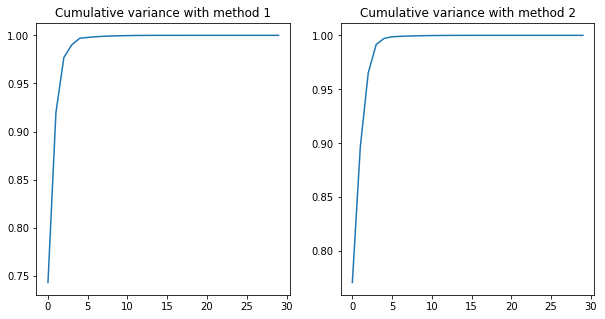

In [6]:
input_data = deepcopy(originalData)

standardized_data,_,_ = standardize(input_data)

percVariance1, _ = PCAWithCovariance(standardized_data)
percVariance2, _ = PCAWithScatterMatrix(standardized_data)
cumulative1 = np.cumsum (percVariance1)
cumulative2 = np.cumsum (percVariance2)

showCumulativeVariance(percVariance1,percVariance2)

# Original dataset, sampled subset

In [7]:
sampled_data = np.random.permutation(standardized_data)[0:1000,:]
sampled_data.shape

(1000, 30)

First method gives:

[0.74805377 0.92433003 0.97889869 0.98951217 0.99703002 0.99788011
 0.99862992 0.99910784 0.99943922 0.9996126  0.99975432 0.9998681
 0.99992948 0.99997354 0.99999298 0.99999451 0.99999586 0.99999688
 0.99999773 0.99999834 0.99999882 0.99999918 0.99999944 0.99999967
 0.99999987 0.99999993 0.99999997 0.99999999 1.         1.        ]
Second method gives:

[0.77135971 0.89825413 0.96715429 0.99246908 0.99693392 0.99871282
 0.99908536 0.99939139 0.99959615 0.99974181 0.99982394 0.99988951
 0.99993757 0.99996676 0.99998768 0.99999692 0.99999765 0.99999823
 0.99999865 0.99999903 0.99999929 0.99999949 0.99999966 0.99999977
 0.99999986 0.99999995 0.99999998 0.99999998 0.99999999 1.        ]


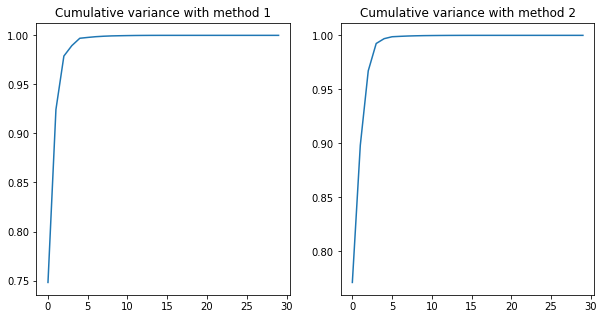

In [8]:
percVariance1, _ = PCAWithCovariance(sampled_data)
percVariance2, _ = PCAWithScatterMatrix(sampled_data)
cumulative1 = np.cumsum (percVariance1)
cumulative2 = np.cumsum (percVariance2)

showCumulativeVariance(percVariance1,percVariance2)

# PCA on the preprocessed dataset

We can try different preprocessing, but the result is more or less the same

In [9]:
#little preprocessing
input_data = deepcopy(originalData)
yb = deepcopy(originalY)

#remove the lines whose mass is -999
input_data, yb = removeLines(input_data, yb ,0,-999)

#substituite the left -999 with 0
numInvalidValues = countInvalid(input_data,-999)
idxCols = np.where(numInvalidValues>0)[0]
input_data = replaceWithZero(input_data,-999,idxCols)

First method gives:

[0.71542595 0.91574707 0.95058326 0.96599137 0.9769055  0.98383741
 0.98908099 0.99275935 0.99553159 0.99757154 0.99866663 0.99939819
 0.99983794 0.99986711 0.99989477 0.99991388 0.99993137 0.99994507
 0.99995656 0.9999676  0.99997576 0.99998276 0.99998844 0.99999241
 0.99999686 0.99999812 0.99999911 0.9999998  1.         1.        ]
Second method gives:

[0.66019343 0.88767055 0.95663184 0.97209159 0.97998818 0.98623367
 0.99041003 0.99349003 0.99566777 0.99734373 0.99856761 0.99921864
 0.99965804 0.99990747 0.99992507 0.99994132 0.9999519  0.99996206
 0.99997022 0.99997714 0.99998319 0.99998798 0.99999181 0.99999446
 0.99999716 0.99999862 0.99999868 0.99999896 0.99999938 1.        ]


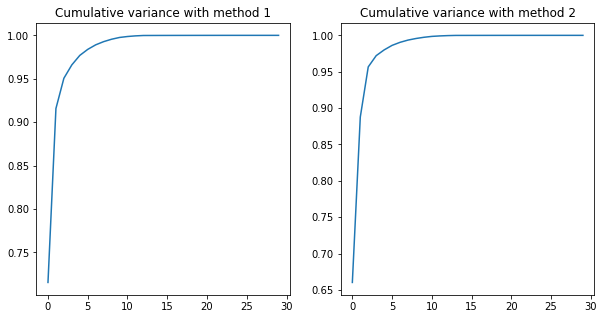

In [10]:
standardized_data,_,_ = standardize(input_data)

percVariance1, _ = PCAWithCovariance(standardized_data)
percVariance2, _ = PCAWithScatterMatrix(standardized_data)
cumulative1 = np.cumsum (percVariance1)
cumulative2 = np.cumsum (percVariance2)

showCumulativeVariance(percVariance1,percVariance2)

# Try on some random sampling of the preprocessed dataset

In [11]:
sampled_data = np.random.permutation(standardized_data)[0:1000,:]
sampled_data.shape

(1000, 30)

First method gives:

[0.74481695 0.93380985 0.96174008 0.97430676 0.98300758 0.98849974
 0.99203427 0.99473274 0.99667611 0.99825703 0.99908102 0.99955164
 0.99987119 0.99989427 0.99991724 0.99993291 0.9999467  0.99995821
 0.99996731 0.9999758  0.99998155 0.99998681 0.9999911  0.99999452
 0.99999768 0.99999858 0.99999935 0.99999986 1.         1.        ]
Second method gives:

[0.66175109 0.8989699  0.96333461 0.97684125 0.98401818 0.98913894
 0.99267224 0.99488846 0.99662059 0.99787757 0.99889887 0.99942505
 0.9997289  0.9999213  0.99993625 0.99995048 0.99996007 0.99996851
 0.99997563 0.99998113 0.99998638 0.99999007 0.99999309 0.99999555
 0.99999772 0.99999777 0.99999797 0.9999983  0.99999886 1.        ]


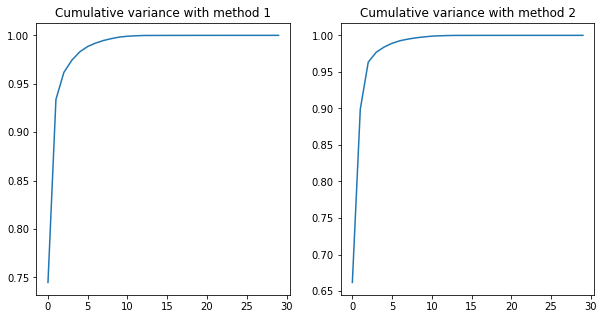

In [12]:

percVariance1, _ = PCAWithCovariance(sampled_data)
percVariance2, _ = PCAWithScatterMatrix(sampled_data)
cumulative1 = np.cumsum (percVariance1)
cumulative2 = np.cumsum (percVariance2)

showCumulativeVariance(percVariance1,percVariance2)